Accuracy: 0.9861111111111112


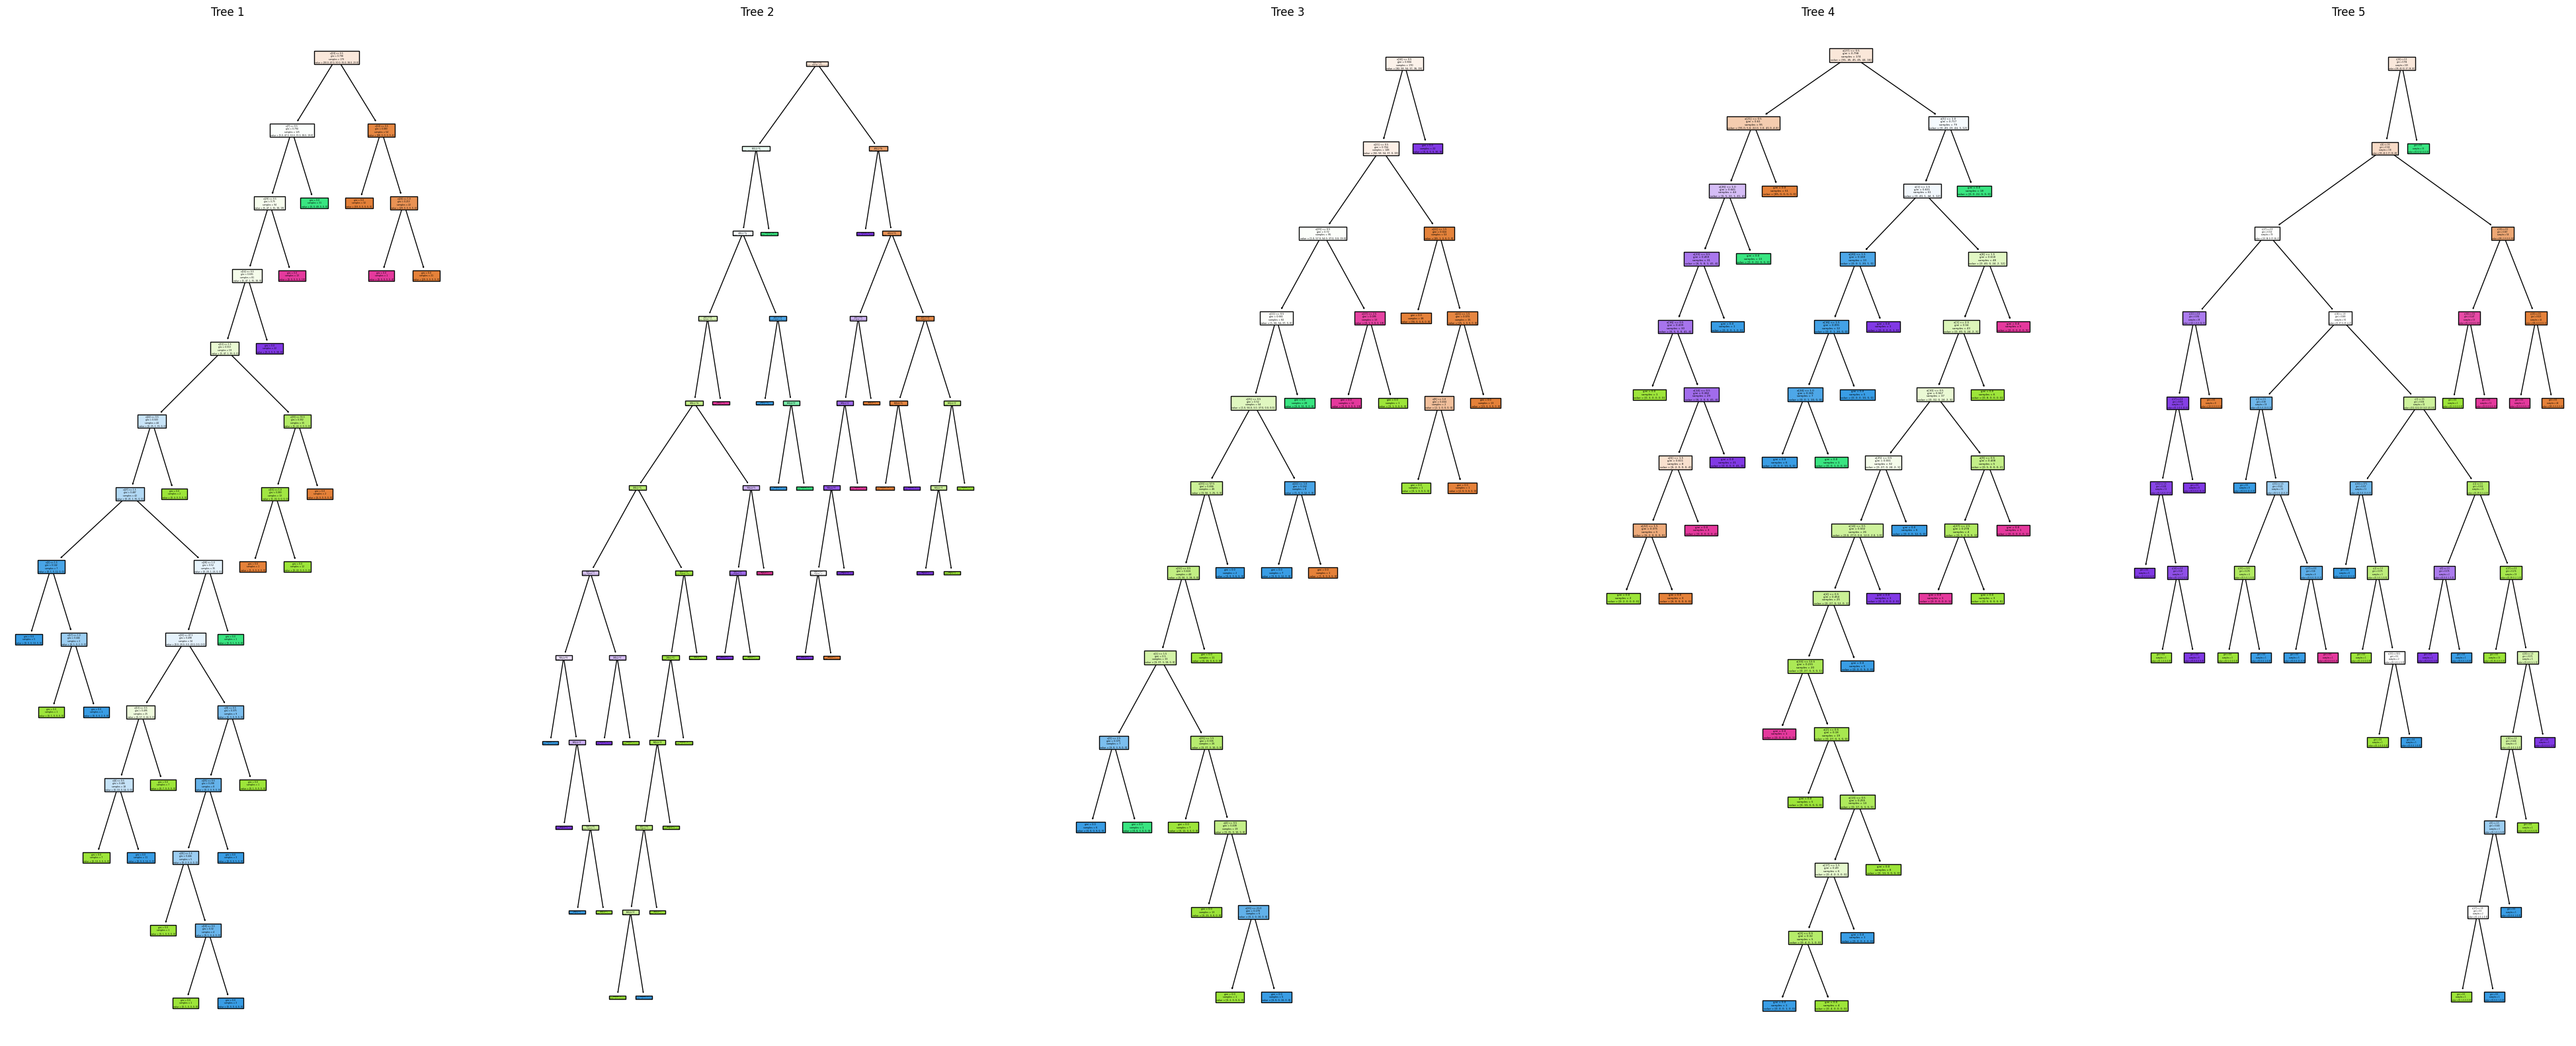

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load your dataset
data = pd.read_csv('Data\dermatology_database_1.csv')

# Handle missing values (replace '?' with NaN)
data.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Split features (X) and target variable (y)
y = data['class']
X = data.drop(columns='class')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot each tree in the forest
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(50, 20))  # Adjust ncols according to the number of trees you want to plot
for i in range(5):  # Plotting first 5 trees as an example
    plot_tree(clf.estimators_[i], filled=True, ax=axes[i])
    axes[i].set_title(f'Tree {i+1}')

plt.show()
